# E7: Introduction to Computer Programming for Scientists and Engineers

## Lab Assignment 6

For each question, you will have to fill in one or more Python functions. We provide an autograder with a number of test cases that you can use to test your function. Note that the fact that your function works for all test cases thus provided does necessarily guarantee
that it will work for all possible test cases relevant to the question. It is your responsibility
to test your function thoroughly, to ensure that it will also work in situations not covered
by the test cases provided

This E7 assignment focuses on graphical representations. You are encouraged to use the
Python documentation to get details on some of the plotting functions you will need. This
assignment will be checked for proper functions and figures and comments in your
code. For this assignment you will write one function and one script which you will "publish"
to create a pdf. More detailed instructions for submitting your assignment are included at
the end of this document.

In [88]:
# Please run this cell, and do not modify the contets
import math
import numpy as np
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import scipy.io as sio
import pandas as pd
np.seterr(all='ignore');
%pylab inline

# %run lab2_ag.py

/anaconda/lib/python3.6/site-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


Populating the interactive namespace from numpy and matplotlib


## Question 1: X-Y Plots: Bay Area Sports Teams

In the Bay Area, there are two professional football teams (San Francisco 49ers and Oakland
Raiders), two professional baseball teams (San Francisco Giants and Oakland Athletics), one
professional hockey team (San Jose Sharks), and one professional basketball team (Golden
State Warriors). In this problem, you will be asked to write a function, `BayAreaTeams(*args)`,
which creates a plot showing the winning percentages of some combination of the six aforementioned sports teams throughout the years. The winning percentage of a sports team for
any given year is calculated as:

$$ \text{Winning Percentage} = (\frac{\text{Games Won}}{\text{Games Played}}) \times 100 $$

The winning percentage is calculated based on games for a single year. Thus, a new winning
percentage is calculated for each year.

This function does not return any output variables to the workspace when called. The
sole intention of this function is to produce a plot - not to output any variables. Note that
there is one input argument in the function declaration line: `*args`. `*args` represents
"variable arguments" and is used when the number of input arguments to a function is not
always the same. In other words, `*args` is used when there are several acceptable inputs
(arguments) to a function, but the function does not require every input to be present for any
given call to the function itself. 

(For example, the Numpy function `np.zeros` which generates
an array filled with zeros, can either be used with one argument as `zeros(N)`, or with two
arguments as `zeros(M,N)`, or with even more arguments)

In this case, the function can take up to 6 arguments. Acceptable inputs for the function
BayAreaTeams are the following character arrays:
'Raiders', 'Niners', 'Warriors', 'Giants', 'Athletics','Sharks'.

You should design your function so that these inputs are case insensitive (see the function
strcmpi to do this). For instance, let's say you want to plot the winning percentages of only
the Oakland Raiders and the San Francisco 49ers on the same figure. To do this, you would
call the function as follows: `BayAreaTeams('Raiders', 'Niners')` Note that we did not
use the other four acceptable arguments. This is the functionality that varargin provides.

The data file `BayAreaSports.mat` has been provided. Inside this `.mat` file is a struct
array called `BayAreaSports`, which contains several fields. Load the `.mat` file into your
workspace and explore the struct to become familiar with the field names and the data
that exists there. You'll notice that for each team, data exists for the years played as well
as the number of wins per year. However, while some teams have data for the number of
games played (which is necessary for calculating the winning percentage), some teams do
not provide the number of games played and instead provide the number of losses per year.
Make sure to think critically about how you can obtain the number of games played per year
for the teams that do not directly provide this data.
A good regular season record is important, but what ultimately matters is if you win
a championship! Thus, the file `BayAreaSports.mat` also includes the years each team won
championships in their respective sport.
Your function should perform the following tasks:
1. Load the file `BayAreaSports.mat`
2. Plot the winning percentage as a function of years for as many of the six teams as
requested by the function call on a single figure. Hint: Recall structs from Lab 3.
3. For each team requested, circular markers should be used with lines connecting the
circular markers. The line thickness should be set to 2.
4. Grid lines should be shown on the figure (see help grid to learn about this command).
5. If no input is provided, the function should not return a figure and instead display the
output: `Please enter at least one professional Bay Area sports team.`
6. If an input is provided that is not one of the acceptable six inputs mentioned above,
the function should not return a figure and instead display the text:
`Please enter either 'Raiders', 'Niners', 'Warriors', 'Giants', 'Athletics',
or 'Sharks'.`
7. The x-axis of the figure should be labeled `Years` with a font size of 20.
8. The y-axis of the figure should be labeled `Winning Percentage` with a font size of 20
and should be limited to values from 0 to 100.
9. The figure should be given a title `Comparison of Bay Area Professional Sports Teams`
with a font size of 20.
10. A legend should be provided that contains an entry for each team requested. The
legend should be in the upper right-hand corner of the figure and not overlap any of
the data.
11. Use team-specific colors for your plots. Python allows you to plot lines with very
specific line/marker colors by using RGB values. To make your figure more festive,
refer to the table below when assigning line/marker colors for the six teams.
12. Plot the championship-year winning percentages on top of the data already plotted
on your figure for each team requested. This championship data should be plotted as
gold pentagrams (5-point stars) with a marker size of 20. The RGB array for gold is
`[1, .843, 0]`. These "gold stars" should not be connected with lines - plot only the
markers on top of the pre-existing data.


| Team Line Color Marker Color                          | Wins | Losses |
|-------------------------------------------------------|------|--------|
| Raiders [0, 0, 0] [0.737, 0.769, 0.788]               | 7    | 6      |
| Niners [0.784, 0, 0.126] [0.753, 0.6, 0.302]          | 9    | 4      |
| Giants [0, 0, 0] [1, 0.302, 0]                        | 8    | 2      |
| Athletics [0.016, 0.290, 0.235] [0.988, 0.729, 0.204] | 5    | 7      |
| Warriors [0.004, 0.275, 0.678] [0.973, 0.773, 0.212]  | 7    | 6      |
| Sharks [0.075, 0, 0.028] [0.04, 0.467, 0.541]         | 3    | 9      |


Test case: if you want to compare the Oakland Raiders and the San Francisco 49ers
(using the function declaration above), your figure should look like Figure 1 below. After
completing the function, include the following code in your script file:

```
type BayAreaTeams % di spl a y func t i on t ext
BayAreaTeams ( ' Raider s ' , ' Niner s ' ) % show Raide r s /49 e r s comparison
BayAreaTeams ( ' Athl e t i c s ' , 'Giants ' ) % show A' s /Giant s comparison
BayAreaTeams ( 'Warriors ' , ' Sharks ' ) % show War r ior s / Sharks comparison
```

![](E7_lab6_1.jpg)
Figure 1: Plot comparing the win percentages over the years of the Raiders and Niners

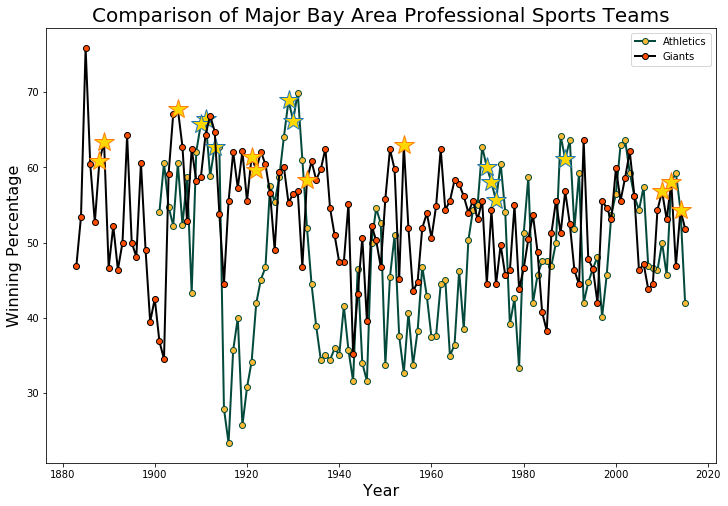

In [74]:
def BayAreaTeams(*args):
    BayAreaSports = sio.loadmat('BayAreaSports.mat')
#     print([x for x in BayAreaSports.keys()])
    # print(mat_contents['__header__'])
    
    BayArea = BayAreaSports['BayAreaSports'][0][0]
    #print(BayArea)
    # Store data into local variables
    Bay = BayArea[0][0][0]
    Athletics_Years = Bay[2].flatten()
    Athletics_Games = Bay[0].flatten()
    Athletics_Wins = Bay[1].flatten()
    Athletics_Win_Percentage = 100*(Athletics_Wins/Athletics_Games)
    # print(Athletics_Years, Athletics_Games, Athletics_Wins, Athletics_Win_Percentage)
    
    Bay = BayArea[1][0][0]
    Giants_Years = Bay[2].flatten()
    Giants_Games = Bay[0].flatten()
    Giants_Wins = Bay[1].flatten()
    Giants_Win_Percentage = 100*(Giants_Wins/Giants_Games)
    
    Bay = BayArea[2][0][0]
    Niners_Years = Bay[2].flatten()
    Niners_Wins = Bay[0].flatten()
    Niners_Losses = Bay[1].flatten()
    Niners_Win_Percentage = 100*(Niners_Wins/(Niners_Wins+Niners_Losses))
#     print(Niners_Years, Niners_Games, Niners_Wins)
#     print(Niners_Win_Percentage)
    
    Bay = BayArea[3][0][0]
    Raiders_Years = Bay[2].flatten()
    Raiders_Wins = Bay[0].flatten()
    Raiders_Losses = Bay[1].flatten()
    Raiders_Win_Percentage = 100*(Raiders_Wins/(Raiders_Wins+Raiders_Losses))
    
    Bay = BayArea[4][0][0]
    Sharks_Years = Bay[2].flatten()
    Sharks_Games = Bay[0].flatten()
    Sharks_Wins = Bay[1].flatten()
    Sharks_Win_Percentage = 100*(Sharks_Wins/Sharks_Games)
    
    Bay = BayArea[5][0][0]
    Warriors_Years = Bay[2].flatten()
    Warriors_Wins = Bay[0].flatten()
    Warriors_Losses = Bay[1].flatten()
    Warriors_Win_Percentage = 100*(Warriors_Wins/(Warriors_Wins+Warriors_Losses))
#     print(Sharks_Games, Sharks_Wins, Sharks_Win_Percentage)
    
    
    Athletics_Champ_Years = BayAreaSports['Athletics_Champ_Years'][0]
    Athletics_Champ_Percentage = BayAreaSports['Athletics_Champ_Percentages'][0]
    
    Giants_Champ_Years = BayAreaSports['Giants_Champ_Years'][0]
    Giants_Champ_Percentage = BayAreaSports['Giants_Champ_Percentages'][0]
    
    Niners_Champ_Years = BayAreaSports['Niners_Champ_Years'][0]
    Niners_Champ_Percentage = BayAreaSports['Niners_Champ_Percentages'][0]
    
    Raiders_Champ_Years = BayAreaSports['Raiders_Champ_Years'][0]
    Raiders_Champ_Percentage = BayAreaSports['Raiders_Champ_Percentages'][0]
    
    Warriors_Champ_Years = BayAreaSports['Warriors_Champ_Years'][0]
    Warriors_Champ_Percentage = BayAreaSports['Warriors_Champ_Percentages'][0]
    
#     Sharks_Years = BayAreaSports['Sharks_Champ_Years'][0]
#     Sharks_Win_Percentage = BayAreaSports['Sharks_Champ_Percentages'][0]
    
    if len(args) == 0:
        print('Please enter at least one professional Bay Area sports team.')
        return
    
    fig, ax = plt.subplots()
    fig.set_size_inches(12, 8)
    for i in range(len(args)):
        if args[i].lower() == 'athletics':
            ax.plot(Athletics_Years,Athletics_Win_Percentage, 'o-',linewidth=2,
                    label='Athletics',color=[.016,.290,.235],markerfacecolor=[.988,.729,.204])
            ax.plot(Athletics_Champ_Years, Athletics_Champ_Percentage, '*',markersize=20,markerfacecolor=[1,.843,0])
        elif args[i].lower() == 'giants':
            ax.plot(Giants_Years,Giants_Win_Percentage, 'o-',linewidth=2,
                    label='Giants',color=[0,0,0],markerfacecolor=[1,.302,0])
            ax.plot(Giants_Champ_Years, Giants_Champ_Percentage, '*',markersize=20,markerfacecolor=[1,.843,0])
        elif args[i].lower() == 'niners':
            ax.plot(Niners_Years,Niners_Win_Percentage, 'o-',linewidth=2,
                    label='Niners',color=[.784,0,.126],markerfacecolor=[.753,.6,.302])
            ax.plot(Niners_Champ_Years, Niners_Champ_Percentage, '*',markersize=20,markerfacecolor=[1,.843,0])
        elif args[i].lower() == 'raiders':
            ax.plot(Raiders_Years,Raiders_Win_Percentage, 'o-',linewidth=2,
                    label='Raiders',color=[0,0,0],markerfacecolor=[.737,.769,.788])
            ax.plot(Raiders_Champ_Years,Raiders_Champ_Percentage, '*',markersize=20,markerfacecolor=[1,.843,0])
        elif args[i].lower() == 'warriors':
            ax.plot(Warriors_Years,Warriors_Win_Percentage, 'o-',linewidth=2,
                    label='Warriors',color=[.004,.275,.678],markerfacecolor=[.973,.773,.212])
            ax.plot(Warriors_Champ_Years, Warriors_Champ_Percentage, '*',markersize=20,markerfacecolor=[1,.843,0])
        elif args[i].lower() == 'sharks':
            ax.plot(Sharks_Years,Sharks_Win_Percentage, 'o-',linewidth=2,
                    label='Sharks',color=[.075,0,.028],markerfacecolor=[.004,.467,.541])
            ax.plot(Sharks_Champ_Years, Sharks_Champ_Percentage, '*',markersize=20,markerfacecolor=[1,.843,0])
        else:
            disp('Please enter either Raiders, Niners, Warriors, Giants, Athletics, or Sharks.')
            
    plt.xlabel('Year', fontsize=16)
    plt.ylim(0, 100)
    plt.ylabel('Winning Percentage', fontsize=16)
    plt.title('Comparison of Major Bay Area Professional Sports Teams', fontsize=20)
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, labels)
    
    
    
    
    plt.autoscale()
    plt.show()
    
BayAreaTeams('athletics','giants')
             

## Question 2: 3D Surface Plots and Subplots

The purpose of this problem is to introduce you to three dimensional plots and subplots.
Imagine we have a function as follows:

$$ z(x,y) = \frac{-y\cos(x)}{\exp(\cos(x)^2 + \sin(y)^2)} $$

First, you will plot the mathematical function above in three dimensions across the
following domain for the independent variables $x$ and $y$:

$$ x,y \in [-5, 5]$$

You will need to create a discrete set of values for x and y at which MATLAB will
evaluate the function z(x; y). For this problem, you should assume a step size of 0.1 between
these discrete values. Look into the built-in MATLAB functions meshgrid to create the
underlying x; y grid. Compute z, then use surf to make your three dimensional gure.
(Type doc meshgrid and doc surf into your command window).
You do not need to write a function for this problem. Instead, type all of your code for this
question in the same script le as the code for the other questions (except for the function{see
the end of the document for details). For your figure, define the axes and title as follows:

1. Set the x-axis to the text `X Axis` with a font size of 16
2. Set the y-axis to the text `Y Axis` with a font size of 16
3. Set the z-axis to the text `Z Axis` with a font size of 16
4. Set the title to the text `E7 - Lab 6 - Question 2` with a font size of 20
5. Add a colorbar to your figure.

When you are finished, your figure should look like Figure 2. You can experiment with the
shading command and change your colormap if you like.
Next, you will look at two dimensional \slices" of the function. The slices we are interested
in analyzing are the following:

1. The slice on the `x = 0` plane
2. The slice on the `y = 0.5` plane
    
Keep in mind that these slices are two dimensional, not three dimensional. For example,
a slice at $x = 0$ means that the equation above is evaluated at $z(0, y)$. Similar observations
can be made about the slice $y = 0.5$. Note that you do not need to do additional calculations.

Since you are just going to be plotting a slice across the existing data that you have already
computed in creating z, you can create this "slice" by properly indexing the array `z`.

You should plot both two dimensional slices on the same figure. To do this, make use of subplots - a feature in Python that allows you to break a figure down into smaller, individual axes that can contain different plots. Type doc subplot into your command window to learn more about how subplots work. You will be making a $1 \times 2$ subplot.

The left-hand-side subplot should contain the two dimensional plot of the $x = 0$ slice and contain the following axis/title labels:

1. Set the x-axis to the text Y Axis with a font size of 16
2. Set the y-axis to the text Z Axis with a font size of 16
3. Set the title to the text Slice at X = 0 with a font size of 20

The right-hand-side subplot should contain the two dimensional plot of the $y = 0.5$ slice and contain the following axis/title labels:

1. Set the x-axis to the text X Axis with a font size of 16
2. Set the y-axis to the text Z Axis with a font size of 16
3. Set the title to the text Slice at Y = 0.5 with a font size of 20

Turn on the background grid for both subplots so your figure looks like Figure 3. Note that both of plots shown are on a single Python figure window. This is the functionality that subplot provides. Visually compare the subplots to the 3D plot you plotted earlier and try to find where these slices exist within the 3D figure.

![](E7_lab6_2.jpg)
Figure 2: 3-D Surface plot
![](E7_lab6_3.jpg)
Figure 3: 2-D line plots of (1) Z axis versus the Y Axis, Slice at X = 0; (2) Z Axis versus the X Axis, Slice at Y = 0.5

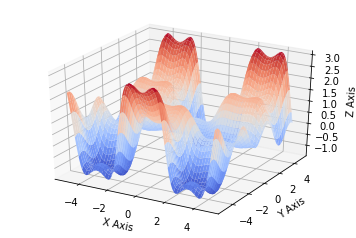

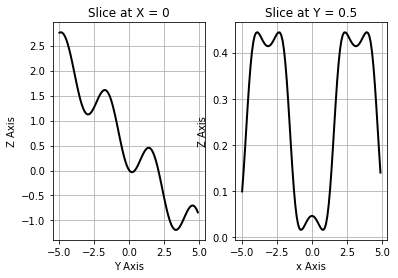

In [87]:
x = np.arange(-5,5,.1)
y = np.arange(-5,5,.1)
X,Y = np.meshgrid(x,y)

Z = -(Y*np.cos(X))/np.exp(np.cos(X)**2)+np.sin(Y)**2

fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(X, Y, Z,cmap=cm.coolwarm)

ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')

plt.show()

x_slice = 0
z_slice1 = -(y*np.cos(x_slice))/np.exp(cos(x_slice)**2) + np.sin(y)**2

y_slice = 0.5
z_slice2 = -(y_slice*np.cos(x))/np.exp(cos(x)**2) + np.sin(y_slice)**2

fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.plot(y,z_slice1, 'k',linewidth=2)
ax1.grid(True)
ax1.set_xlabel('Y Axis')
ax1.set_ylabel('Z Axis')
ax1.set_title('Slice at X = 0')

ax2 = fig.add_subplot(122)
ax2.plot(x,z_slice2, 'k',linewidth=2)
ax2.grid(True)
ax2.set_xlabel('x Axis')
ax2.set_ylabel('Z Axis')
ax2.set_title('Slice at Y = 0.5')

plt.show()

## Question 3: Contour & Vector Plotting: Aquifer Simulation

Groundwater is an important resource which provides water for municipal, agricultural, and industrial needs. Contamination from a variety of sources can diminish the quality of groundwater supplies, causing health problems for people who drink it or other problems,
depending on the use. Modeling the motion of contaminants can allow us to use groundwater
resources while preventing exposure to toxic contaminants. Modeling contaminant migration
in groundwater requires computing groundwater velocity, which can be controlled by various
soil properties, such as permeability. Permeability is a measure of how conducive a soil
is to flow, and can vary by orders of magnitude over relatively short distances. (You can
imagine that the permeability of sand will be much greater than that of clay, allowing water
to flow through sand with significantly greater velocity.) In this question you will visually
demonstrate the relationship between soil permeability and groundwater velocity.

The file `K.csv` contains values of permeability for an aquifer, which was simulated using
geostatistical methods. The files `vx.csv` and `vy.csv` contain $x$ components and $y$ components of velocity, respectively, throughout the same aquifer, obtained using numerical
methods. All of the files contain data on a 50 x 50 grid, with each grid cell representing a
10m x 10m area. 

These datasets were generated by your head GSI, Brad Harken, who works
on problems of this nature for his PhD research!

In this question you will add to your function from problem 2 where you:

1. Load the three data files named above using `csvread` (be careful with the headers).
Hint: Adjust csvread to start at appropriate point in data file.
2. Show the spatial distribution of permeability using a filled contour plot (use the command contourf).
3. Display the spatial variability of groundwater velocity by plotting velocity vectors on
the same plot as the filled contour plot. Use `quiver` to help you with the velocity plot.
4. Often when analyzing data, transformations of the data can be a helpful tool for seeing
the data in a new perspective and visualizing different trends. For instance, taking the
logarithm of a dataset can take emphasis away from extreme values and more simply
show overall variability. On a new figure, show a filled contour plot of the natural
logarithm of permeability.
5. Ensure that your plots are presentable (adjust the colorbar, shape and colors of the
arrows, legend, title, axis as needed). Create a title and axis labels that make the
content of your plots easy to understand on their own (without needed accompanying
text). Note the axis values and ensure they match the appropriate field measurements.
Hint: You need to convert your axis to adequately match the field scale measurements.

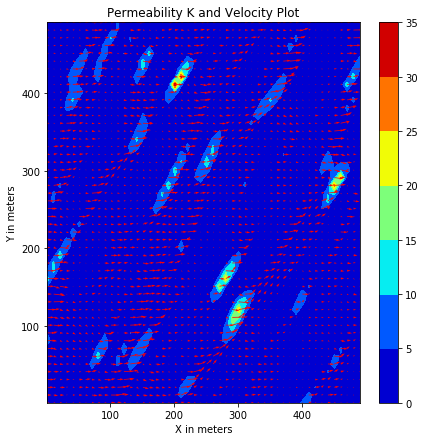

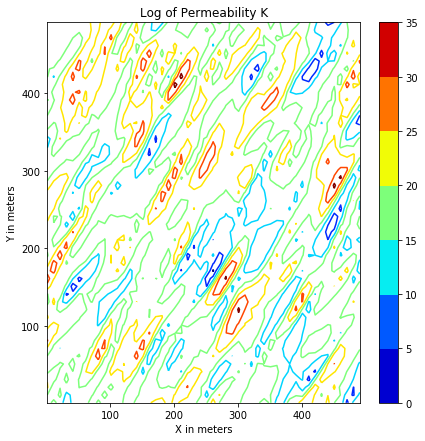

In [114]:
Perm = pd.read_csv('K.csv')
Vel_x = pd.read_csv('vx.csv')
Vel_y = pd.read_csv('vy.csv')

x = np.arange(1,500,10)
y = np.arange(1,500,10)
X,Y = np.meshgrid(x,y)

fig = plt.figure(figsize=(7,7))
contour = plt.contourf(X,Y,Perm.as_matrix()[:,1:],cmap='jet')
plt.quiver(X,Y,Vel_x.as_matrix()[:,1:], Vel_y.as_matrix()[:,1:],color='r')
plt.xlabel('X in meters')
plt.ylabel('Y in meters')
plt.title('Permeability K and Velocity Plot')
fig.colorbar(contour)
plt.show()

fig = plt.figure(figsize=(7,7))
countour = plt.contour(X,Y,np.log(Perm.as_matrix()[:,1:]),cmap='jet')
plt.xlabel('X in meters')
plt.ylabel('Y in meters')
plt.title('Log of Permeability K')
fig.colorbar(contour)
plt.show()